<a href="https://colab.research.google.com/github/donggale72/10000.html/blob/main/6_3_advanced_usage_of_recurrent_neural_networks%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 790, done.
remote: Counting objects: 100% (363/363), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 790 (delta 220), reused 323 (delta 195), pack-reused 427
Receiving objects: 100% (790/790), 41.83 MiB | 13.42 MiB/s, done.
Resolving deltas: 100% (413/413), done.


In [ ]:
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *
from plot_result import *

In [ ]:
! git clone https://github.com/gilbutITbook/006975.git

Cloning into '006975'...
remote: Enumerating objects: 102534, done.
remote: Total 102534 (delta 0), reused 0 (delta 0), pack-reused 102534
Receiving objects: 100% (102534/102534), 202.75 MiB | 15.13 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Checking out files: 100% (104042/104042), done.


In [ ]:
data_path='/content/006975/datasets/jena_climate/jena_climate_2009_2016.csv'
f=open(data_path)
data=f.read()
f.close()

In [ ]:
lines=data.split('\n')
print(len(lines))
header=lines[0]
lines=lines[1:]
print(header)
print(len(lines),lines[0])

420552
"Date Time","p (mbar)","T (degC)","Tpot (K)","Tdew (degC)","rh (%)","VPmax (mbar)","VPact (mbar)","VPdef (mbar)","sh (g/kg)","H2OC (mmol/mol)","rho (g/m**3)","wv (m/s)","max. wv (m/s)","wd (deg)"
420551 01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30


In [ ]:
len(header.split(','))

15

In [ ]:
lines_arr=[]
for i, line in enumerate(lines):
  values=[]
  for x in line.split(',')[1:]:
    value=float(x)
    values.append(value)
  lines_arr.append(values)
lines_arr=np.array(lines_arr)
print(lines_arr.shape)

(420551, 14)


In [ ]:
temp=lines_arr[:, 1]

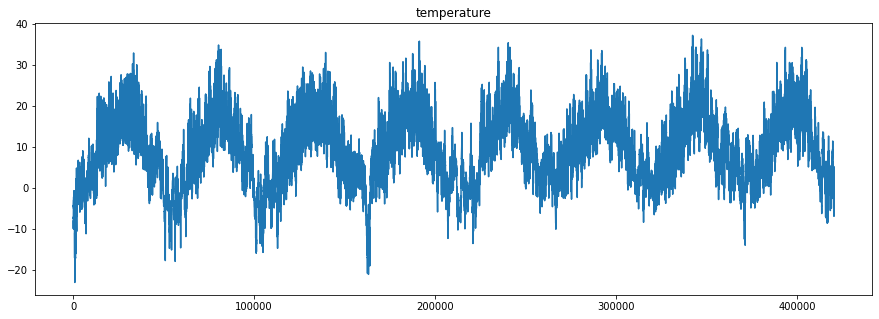

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(temp); plt.title('temperature')
plt.show()

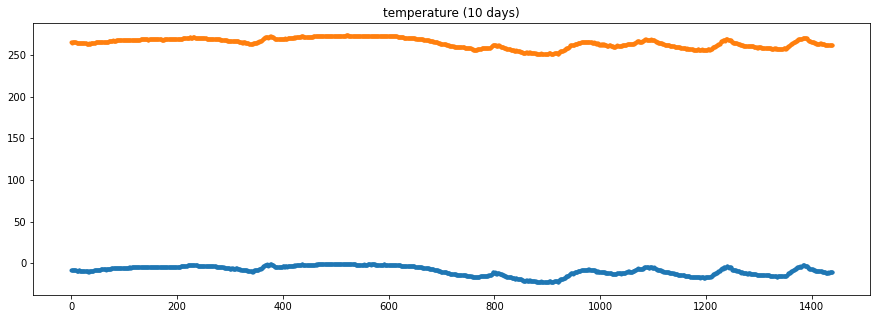

In [ ]:
temp=lines_arr[:,1]
Tpot=lines_arr[:, 2]
plt.figure(figsize=(15,5))
plt.plot(temp[:144*10], marker='.')
plt.plot(Tpot[:144*10], marker='.')

plt.title('temperature (10 days)')
plt.show()

In [ ]:
mean=lines_arr[: 200000].mean(axis=0)
print(mean)
std=lines_arr[:200000].std(axis=0)
print(std)
float_data=(lines_arr-mean)/std
print(lines_arr.shape, float_data.shape)

[ 988.88635885    9.07734895  283.14631345    4.44854725   75.35405895
   13.3829553     9.29695535    4.08591725    5.8752111     9.40521005
 1217.51429655    2.1510037     3.56950915  176.21703355]
[ 8.48043388  8.85249908  8.95324185  7.16584991 16.72731652  7.68914559
  4.19808168  4.84034436  2.66564926  4.25206364 42.48884277  1.53666449
  2.33067298 86.61322998]
(420551, 14) (420551, 14)


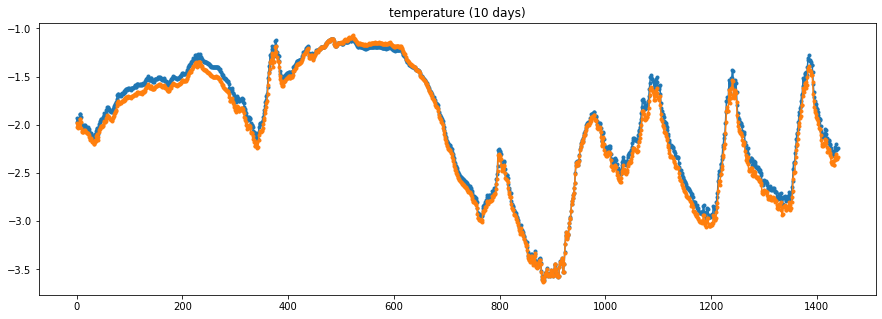

In [ ]:
temp=float_data[:, 1]
Tpot=float_data[:, 2]
plt.figure(figsize=(15,5))
plt.plot(temp[:144*10], marker='.')
plt.plot(Tpot[:144*10], marker='.')
plt.title('temperature (10 days)')
plt.show()

In [ ]:
def number_generator():
  n=0
  while True:
    n+=1
    yield n
    if n==5: break

In [ ]:
for i in number_generator():
  print(i)

1
2
3
4
5


In [ ]:
gen=number_generator()

In [ ]:
next(gen)

1

In [ ]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
  if max_index is None:
    max_index=len(data)-delay-1
  i= min_index + lookback
  while 1:
    if shuffle:
      rows= np.random.randint(
          min_index+lookback, max_index, size=batch_size  )
    else:
      if i +batch_size>=max_index:
        i= min_index+ lookback
      rows=np.arange(i, min(i +batch_size, max_index))
      i += len(rows)

    samples=np.zeros((len(rows),
                      lookback//step,
                      data.shape[-1]))
    targets=np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices=range(rows[j]-lookback, rows[j], step)
      samples[j]=data[indices]
      targets[j]=data[rows[j]+delay][1]
    yield samples, targets

In [ ]:
lookback=1440
step=6
delay=144
batch_size=128

train_gen= generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=0,
                     max_index=200000,
                     shuffle=True,
                     step=step,
                     batch_size=batch_size
                     )
val_gen= generator(float_data, 
                   lookback=lookback,
                   delay=delay,
                   min_index=200001,
                   max_index=300000,
                   step=step,
                   batch_size=batch_size)
test_gen=generator(float_data,
                   lookback=lookback,
                   delay=delay,
                   min_index=300001,
                   max_index=None,
                   step=step,
                   batch_size=batch_size)

val_steps=(300000-200001-lookback)//batch_size
test_steps=(len(float_data)-300001-lookback)//batch_size

(128, 240, 14) (128,)


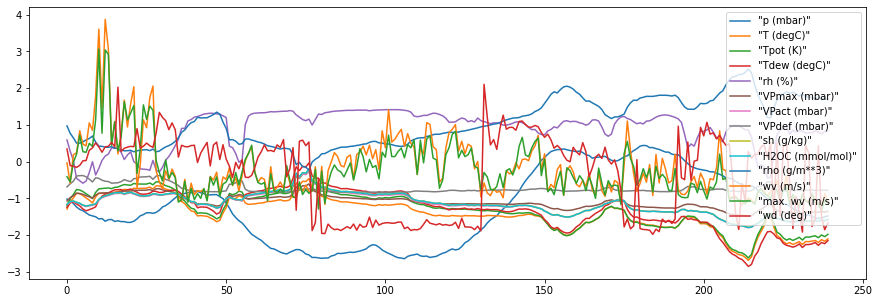

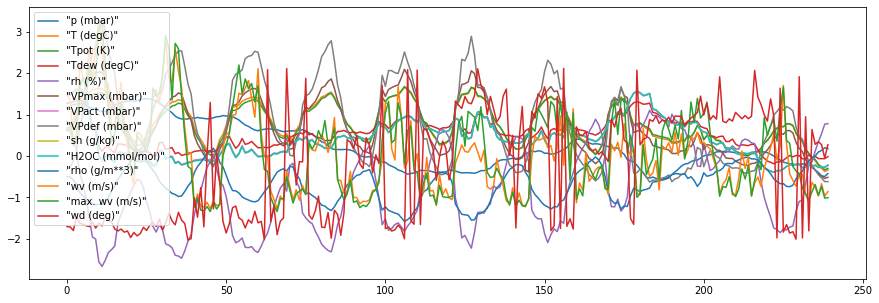

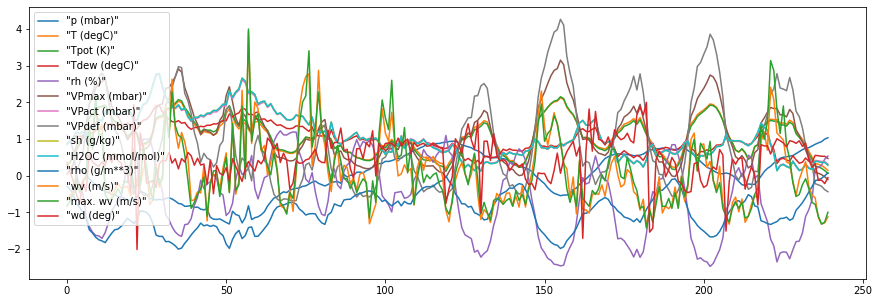

In [ ]:
for samples, targets in train_gen:
  print(samples.shape, targets.shape)
  for i in range(3):
    plt.figure(figsize=(15,5))
    plt.plot(samples[i])
    plt.legend(header.split(',')[1:])
    plt.show()
  break

In [ ]:
val_steps

769

In [ ]:
def evaluate_method():
  maes=[]
  for step in range(val_steps):
    samples, targets=next(val_gen)
    preds=samples[:, -1,1]
    mae=np.mean(np.abs(preds-targets))
    maes.append(mae)
  return np.mean(maes)

basemae=np.round(evaluate_method(),2)
print(basemae)

0.29


In [ ]:
0.29*std[1]

2.5672247338393377

In [ ]:
timesteps=240
features=14
x=layers.Input(shape=(timesteps, features))
y=layers.Flatten()(x)
y=layers.Dense(32,activation='relu')(y)
y=layers.Dense(1)(y)

model=models.Model(x,y)
model.compile(optimizer='rmsprop', loss='mae')
history=model.fit(train_gen, validation_data=val_gen,
                  epochs= 20,
                  steps_per_epoch=500,
                  validation_steps=val_steps)


Epoch 1/20
500/500 [==============================] - 15s 23ms/step - loss: 1.4486 - val_loss: 0.6255
Epoch 2/20
500/500 [==============================] - 15s 31ms/step - loss: 0.4829 - val_loss: 0.3845
Epoch 3/20
500/500 [==============================] - 10s 21ms/step - loss: 0.2971 - val_loss: 0.2973
Epoch 4/20
500/500 [==============================] - 18s 35ms/step - loss: 0.2657 - val_loss: 0.3165
Epoch 5/20
500/500 [==============================] - 12s 25ms/step - loss: 0.2541 - val_loss: 0.3123
Epoch 6/20
500/500 [==============================] - 14s 27ms/step - loss: 0.2450 - val_loss: 0.3200
Epoch 7/20
500/500 [==============================] - 13s 25ms/step - loss: 0.2385 - val_loss: 0.3392
Epoch 8/20
500/500 [==============================] - 13s 25ms/step - loss: 0.2325 - val_loss: 0.3131
Epoch 9/20
500/500 [==============================] - 12s 25ms/step - loss: 0.2255 - val_loss: 0.3226
Epoch 10/20
500/500 [==============================] - 16s 33ms/step - loss: 0.222

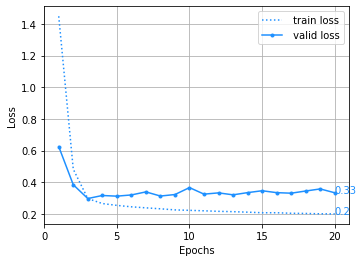

In [ ]:
plot_lcurve([history], [''],['dodgerblue'], x_itv=5)

In [ ]:
timesteps=240
features=14
x=layers.Input(shape=(timesteps, features))
y=layers.GRU(32)(x)
y=layers.Dense(1)(y)

model=models.Model(x,y)
model.compile(optimizer='rmsprop', loss='mae')
history=model.fit(train_gen, validation_data=val_gen,
                  epochs= 20,
                  steps_per_epoch=500,
                  validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 23s 35ms/step - loss: 0.3017 - val_loss: 0.2734
Epoch 2/20
500/500 [==============================] - 18s 35ms/step - loss: 0.2870 - val_loss: 0.2740
Epoch 3/20
500/500 [==============================] - 21s 42ms/step - loss: 0.2790 - val_loss: 0.2664
Epoch 4/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2741 - val_loss: 0.2660
Epoch 5/20
500/500 [==============================] - 19s 38ms/step - loss: 0.2704 - val_loss: 0.2707
Epoch 6/20
500/500 [==============================] - 19s 38ms/step - loss: 0.2660 - val_loss: 0.2640
Epoch 7/20
500/500 [==============================] - 19s 39ms/step - loss: 0.2626 - val_loss: 0.2645
Epoch 8/20
500/500 [==============================] - 20s 40ms/step - loss: 0.2557 - val_loss: 0.2705
Epoch 9/20
500/500 [==============================] - 19s 39ms/step - loss: 0.2530 - val_loss: 0.2676
Epoch 10/20
500/500 [==============================] - 22s 44ms/step - loss: 0.248

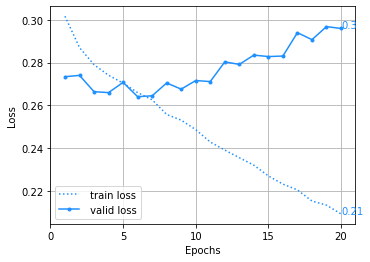

In [ ]:
plot_lcurve([history], [''],['dodgerblue'], x_itv=5)

In [ ]:
from keras.models import Sequential
from keras import layers
#from keras.optimizers import RMSprop
timesteps=240
features=14
#x=layers.Input(shape=(timesteps, features))
model=Sequential()
model.add(layers.GRU(32, dropout=0.2,
             input_shape=(timesteps, features)))
model.add(layers.Dense(1))

#model=models.Model(x,y)
model.compile(optimizer='rmsprop', loss='mae')
history=model.fit(train_gen, validation_data=val_gen,
                  epochs= 20,
                  steps_per_epoch=500,
                  validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 17s 31ms/step - loss: 0.3279 - val_loss: 0.2731
Epoch 2/20
500/500 [==============================] - 16s 32ms/step - loss: 0.3022 - val_loss: 0.2804
Epoch 3/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2974 - val_loss: 0.2727
Epoch 4/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2938 - val_loss: 0.2699
Epoch 5/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2892 - val_loss: 0.2714
Epoch 6/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2847 - val_loss: 0.2740
Epoch 7/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2795 - val_loss: 0.2685
Epoch 8/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2746 - val_loss: 0.2755
Epoch 9/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2701 - val_loss: 0.2741
Epoch 10/20
500/500 [==============================] - 16s 32ms/step - loss: 0.267

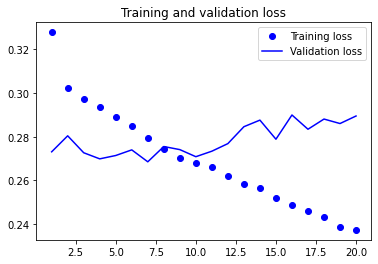

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(loss)+1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras import layers

model=Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     return_sequences=True,
                     input_shape=(timesteps, features)))

model.add(layers.GRU(64,
                     activation='relu',
                     dropout=0.1))

model.add(layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(loss)+1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
def reverse_order_generator(data, lookback, delay, min_index, max_index,
                            shuffle=False, batch_size=128, step=6):
  if max_index is None:
    max_index=len(data)-delay-1
  i = min_index+lookback
  while 1:
    if shuffle:
      rows= np.random.randint(
          min_index + lookback, max_index, size=batch_size)
    else:
      if i +batch_size>=max_index:
        i=min_index + lookback
        rows=np.arange(i, min(i + batch_size, max_index))
        i+=len(rows)

    samples = np.zeros((len(row), lookback//step,
                        data.shape[-1]))
    
    targets= np.zeros((len(row),))

    for j, row in enumerate(rows):
      indices=range(rows[j]-lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j]=data[rows[j] + delay ][1]
    yield samples[:, ::-1, :], targets

train_gen_reverse= reverse_order_generator(
    float_data,
    lookback = lookback,
    delay=datay,
    min_index=200000,
    shuffle=True,
    step=step,
    batch_size=batch_size
    )
val_gen_reverse=reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step,
    batch_size=batch_size
)

In [ ]:
model=Sequential()
model.add(layers.GRU(32, input_shape(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen_reverse,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_steps=val_gen_reverse,
                              validation_steps=val_steps)

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs= range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features =10000
maxlen=500

(x_train, y_train), (x_test, y_test)=imdb.load_data(num_words=max_features)

x_train=[x[::-1] for x in x_train]
x_test=[x[::-1] for x in x_test]

x_train=sequence.pad_sequences(max_features, maxlen=maxlen)
x_test=sequence.pad_seqeunces(x_test, maxlen=maxlen)

model=Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history=model.fit(x_train, y_train, 
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2)

In [ ]:
from keras import backend as k
k.clear_session()


In [ ]:
model= Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(x_train, epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model=Sequential()
model.add(layers.Bidirectional(layers.GRU(32), input_shape=(None, float_data.shape[-1])))

model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history=model.fit_generator(train_gen, 
                            steps_per_epoch=500,
                            epochs=40,
                            validation_data=val_gen,
                            validation_steps=val_steps)